# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Sphero Edu** di Google Play Store. 

## 🔧 **Libraries Used**

In [1]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.sphero.sprk')  # ID aplikasi sphero_edu
print("Versi terbaru:", info['version'])

Versi terbaru: 7.2.4


In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.sphero.sprk',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6e7bfb10-9eda-4521-8045-e8d3c3b978dc,Robert Wheate,https://play-lh.googleusercontent.com/a-/ALV-U...,I would give this 0 stars if I could. I have t...,1,1,7.2.4,2025-06-06 14:36:48,None,NaT,7.2.4
1,ed2f6efe-c44e-43c7-b86a-05f10f068b80,Bouldin Family,https://play-lh.googleusercontent.com/a/ACg8oc...,has bad programming,1,0,7.2.4,2025-05-28 21:20:42,None,NaT,7.2.4
2,c0c68b6d-b3d8-4ae4-adc3-29d57a643604,Leo Barron,https://play-lh.googleusercontent.com/a/ACg8oc...,"I have the star wars droids by sphero, and now...",1,2,7.2.4,2025-05-12 01:39:07,Sphero no longer produces or supports these pr...,2025-05-28 20:29:03,7.2.4
3,1fc0c774-6297-4c63-a8c3-7bb3dd051608,Victor Daniel Ramírez G,https://play-lh.googleusercontent.com/a/ACg8oc...,I really wanted to use my Bb-8 again and it sa...,1,2,7.2.4,2025-05-11 06:48:15,Sphero no longer produces or supports these pr...,2025-05-28 20:28:47,7.2.4
4,675e594d-3219-4d0c-8f8a-631d38090b41,Sonya Dorner,https://play-lh.googleusercontent.com/a-/ALV-U...,I could not be more disappointed and angry tha...,1,19,7.2.4,2025-05-08 02:54:44,Sphero no longer produces or supports these pr...,2025-05-28 20:28:29,7.2.4
...,...,...,...,...,...,...,...,...,...,...,...
995,8ef2010e-8cfb-4e3b-8819-ec55f45b1691,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It is so fun it is a toy but a resource as well.,5,1,3.0.2,2017-01-01 23:43:11,None,NaT,3.0.2
996,0a22ce47-8410-47fe-9ad3-26940acb720d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ive only opened sphero yesterday and I all rea...,5,0,3.0.2,2016-12-30 21:09:15,None,NaT,3.0.2
997,bc268e5a-c1c1-4ba4-8279-5df0c8523762,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can not install app on Samsung tab 4 7.0 kit...,1,0,None,2016-12-30 00:57:50,"Hello Doug, \nThank you for your comment. Can ...",2016-12-30 01:26:29,None
998,f12b0faa-d6f1-4e2a-931e-d463cec447a3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,My Sphero sprk+ will light up a purplish color...,2,1,3.0.2,2016-12-29 08:09:55,"Hello Ricky, \nThank you for your comment. Ple...",2016-12-29 22:27:43,3.0.2


In [5]:
output_path = "../data/review_sphero_edu.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_sphero_edu.xlsx


In [6]:
# # Import data
# file_path = "../data/review_sphero_edu.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,I would give this 0 stars if I could. I have t...,1
1,has bad programming,1
2,"I have the star wars droids by sphero, and now...",1
3,I really wanted to use my Bb-8 again and it sa...,1
4,I could not be more disappointed and angry tha...,1
...,...,...
995,It is so fun it is a toy but a resource as well.,5
996,Ive only opened sphero yesterday and I all rea...,5
997,I can not install app on Samsung tab 4 7.0 kit...,1
998,My Sphero sprk+ will light up a purplish color...,2


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    614
1    200
4     85
3     58
2     43
Name: count, dtype: int64

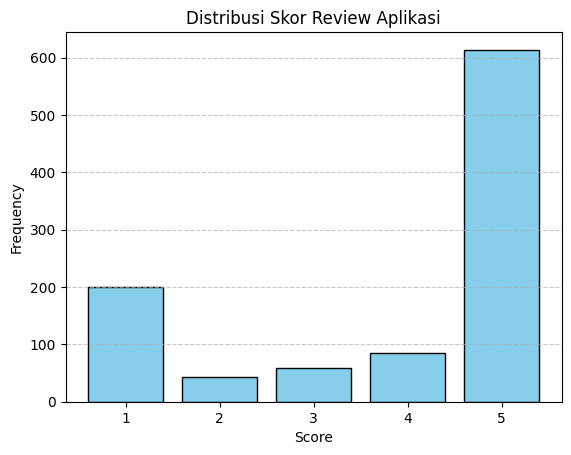

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,3.870000
std,1.621644
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

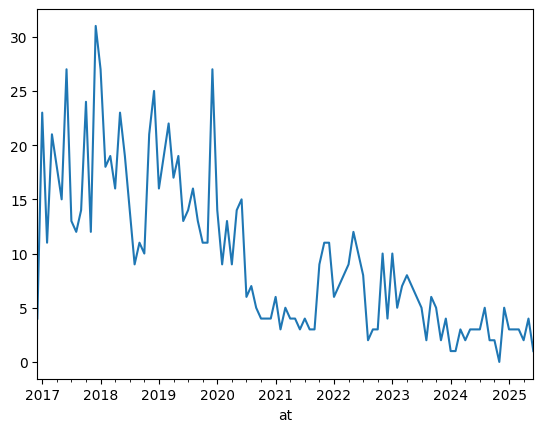

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [12]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [13]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...
1,has bad programming,1,has bad programming
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...


In [14]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...
1,has bad programming,1,has bad programming
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...


In [15]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...,"[i, would, give, this, 0, stars, if, i, could...."
1,has bad programming,1,has bad programming,"[has, bad, programming]"
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now...","[i, have, the, star, wars, droids, by, sphero,..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...,"[i, really, wanted, to, use, my, bb-8, again, ..."
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...,"[i, could, not, be, more, disappointed, and, a..."


In [16]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [17]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [18]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...,"[i, would, give, this, 0, stars, if, i, could....","[i, would, give, this, 0, stars, if, i, could....","[would, give, stars, old, driods, son, wanted,..."
1,has bad programming,1,has bad programming,"[has, bad, programming]","[has, bad, programming]","[bad, programming]"
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now...","[i, have, the, star, wars, droids, by, sphero,...","[i, have, the, star, wars, droids, by, sphero,...","[star, wars, droids, find, use, support, would..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...,"[i, really, wanted, to, use, my, bb-8, again, ...","[i, really, wanted, to, use, my, bb-8, again, ...","[really, wanted, use, says, connected, control..."
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...,"[i, could, not, be, more, disappointed, and, a...","[i, could, not, be, more, disappointed, and, a...","[could, disappointed, angry, support, bought, ..."


In [19]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
32,It would be really nice if there was an option...,3,it would be really nice if there was an option...,"[it, would, be, really, nice, if, there, was, ...","[it, would, be, really, nice, if, there, was, ...","[would, really, nice, option, change, settings..."
191,This does NOT WORK with BB8 sphero!! Do not ev...,1,this does not work with bb8 sphero!! do not ev...,"[this, does, not, work, with, bb8, sphero, !, ...","[this, does, not, work, with, bb8, sphero, !, ...","[even, buy, expensive, paperweight, nice]"
254,Nice app to code with sphero,5,nice app to code with sphero,"[nice, app, to, code, with, sphero]","[nice, app, to, code, with, sphero]","[nice, code]"
271,Nice education 👍👍👍👍👌👌👌,4,nice education 👍👍👍👍👌👌👌,"[nice, education, 👍👍👍👍👌👌👌]","[nice, education, 👍👍👍👍👌👌👌]","[nice, education]"
284,On the box of my R2-D2 is written that he is c...,5,on the box of my r2-d2 is written that he is c...,"[on, the, box, of, my, r2-d2, is, written, tha...","[on, the, box, of, my, r2-d2, is, written, tha...","[box, written, compatible, actually, seems, ti..."
371,very very nice very very good,5,very very nice very very good,"[very, very, nice, very, very, good]","[very, very, nice, very, very, good]","[nice, good]"
394,Very nice app,5,very nice app,"[very, nice, app]","[very, nice, app]",[nice]
406,Nice intro to coding specifically Javascript,5,nice intro to coding specifically javascript,"[nice, intro, to, coding, specifically, javasc...","[nice, intro, to, coding, specifically, javasc...","[nice, intro, coding, specifically, javascript]"
463,its a nice way to teach kids how to code,5,its a nice way to teach kids how to code,"[its, a, nice, way, to, teach, kids, how, to, ...","[its, a, nice, way, to, teach, kids, how, to, ...","[nice, way, teach, kids, code]"
542,"Nice for learning robot coding, slightly innac...",4,"nice for learning robot coding, slightly innac...","[nice, for, learning, robot, coding, ,, slight...","[nice, for, learning, robot, coding, ,, slight...","[nice, learning, robot, coding, slightly, inna..."


In [20]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...,"[i, would, give, this, 0, stars, if, i, could....","[i, would, give, this, 0, stars, if, i, could....","[would, give, stars, old, driods, son, wanted,...","[would, give, star, old, driod, son, want, bad..."
1,has bad programming,1,has bad programming,"[has, bad, programming]","[has, bad, programming]","[bad, programming]","[bad, programming]"
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now...","[i, have, the, star, wars, droids, by, sphero,...","[i, have, the, star, wars, droids, by, sphero,...","[star, wars, droids, find, use, support, would...","[star, war, droids, find, use, support, would,..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...,"[i, really, wanted, to, use, my, bb-8, again, ...","[i, really, wanted, to, use, my, bb-8, again, ...","[really, wanted, use, says, connected, control...","[really, want, use, say, connected, control, a..."
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...,"[i, could, not, be, more, disappointed, and, a...","[i, could, not, be, more, disappointed, and, a...","[could, disappointed, angry, support, bought, ...","[could, disappoint, angry, support, buy, star,..."


In [21]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,I would give this 0 stars if I could. I have t...,1,i would give this 0 stars if i could. i have t...,"[i, would, give, this, 0, stars, if, i, could....","[i, would, give, this, 0, stars, if, i, could....","[would, give, stars, old, driods, son, wanted,...","[would, give, star, old, driod, son, want, bad...","[would, give, star, old, son, want, bad, compa..."
1,has bad programming,1,has bad programming,"[has, bad, programming]","[has, bad, programming]","[bad, programming]","[bad, programming]","[bad, programming]"
2,"I have the star wars droids by sphero, and now...",1,"i have the star wars droids by sphero, and now...","[i, have, the, star, wars, droids, by, sphero,...","[i, have, the, star, wars, droids, by, sphero,...","[star, wars, droids, find, use, support, would...","[star, war, droids, find, use, support, would,...","[star, war, droids, find, use, support, would,..."
3,I really wanted to use my Bb-8 again and it sa...,1,i really wanted to use my bb-8 again and it sa...,"[i, really, wanted, to, use, my, bb-8, again, ...","[i, really, wanted, to, use, my, bb-8, again, ...","[really, wanted, use, says, connected, control...","[really, want, use, say, connected, control, a...","[really, want, use, say, connected, control, a..."
4,I could not be more disappointed and angry tha...,1,i could not be more disappointed and angry tha...,"[i, could, not, be, more, disappointed, and, a...","[i, could, not, be, more, disappointed, and, a...","[could, disappointed, angry, support, bought, ...","[could, disappoint, angry, support, buy, star,...","[could, disappoint, support, buy, star, war, g..."


In [22]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 944


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [23]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [24]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

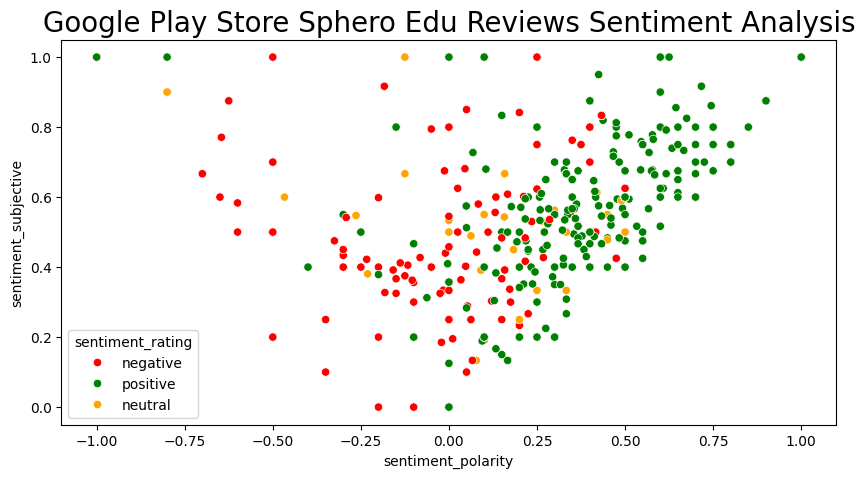

In [25]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Sphero Edu Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [26]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 655 review
- neutral : 57 review
- negative: 232 review


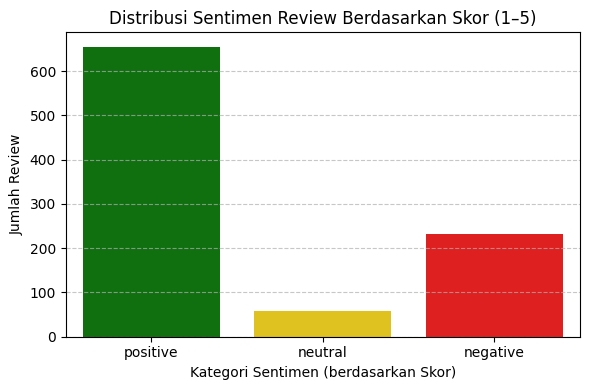

In [27]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

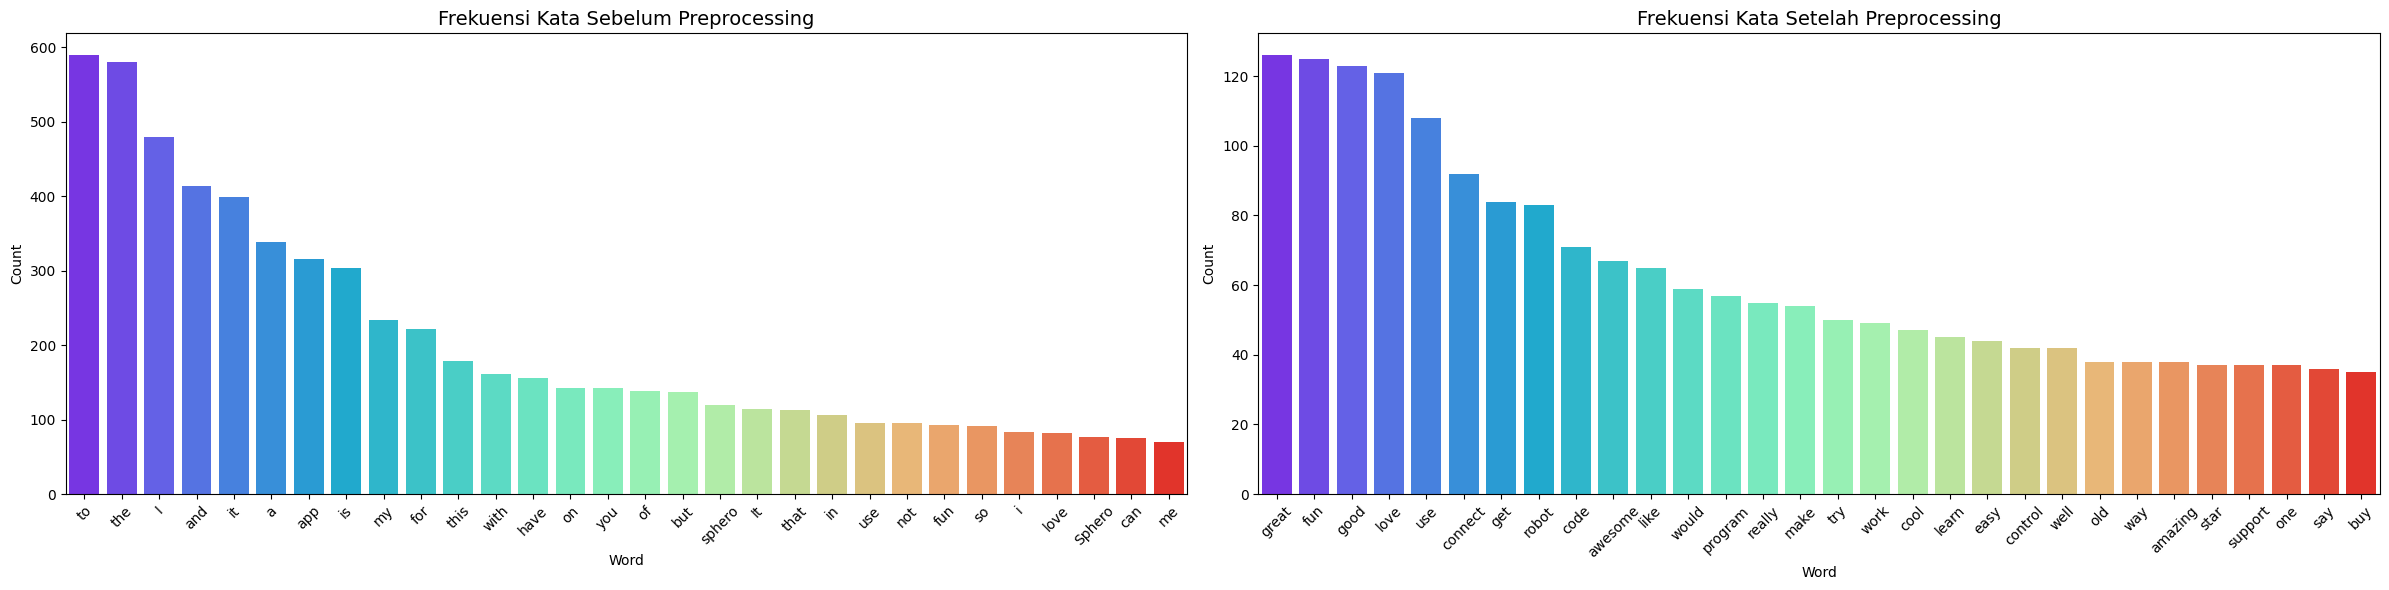

In [28]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [29]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,"[i, would, give, this, 0, stars, if, i, could....",i would give this 0 stars if i could. i have t...
1,"[has, bad, programming]",has bad programming
2,"[i, have, the, star, wars, droids, by, sphero,...","i have the star wars droids by sphero , and no..."
3,"[i, really, wanted, to, use, my, bb-8, again, ...",i really wanted to use my bb-8 again and it sa...
4,"[i, could, not, be, more, disappointed, and, a...",i could not be more disappointed and angry tha...


In [31]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [32]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [33]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,"[i, would, give, this, 0, stars, if, i, could....",i would give this 0 stars if i could. i have t...,0.179,0.683,0.138,-0.3238,negative
1,"[has, bad, programming]",has bad programming,0.636,0.364,0.000,-0.5423,negative
2,"[i, have, the, star, wars, droids, by, sphero,...","i have the star wars droids by sphero , and no...",0.161,0.800,0.039,-0.7997,negative
3,"[i, really, wanted, to, use, my, bb-8, again, ...",i really wanted to use my bb-8 again and it sa...,0.118,0.882,0.000,-0.4215,negative
4,"[i, could, not, be, more, disappointed, and, a...",i could not be more disappointed and angry tha...,0.183,0.712,0.106,-0.8043,negative


In [34]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 662 review
- Neutral : 123 review
- Negative: 159 review


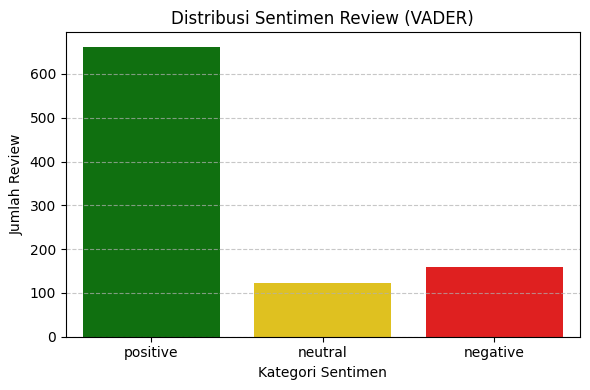

In [35]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [37]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative               114       64        54
neutral                 17        9        31
positive                28       50       577


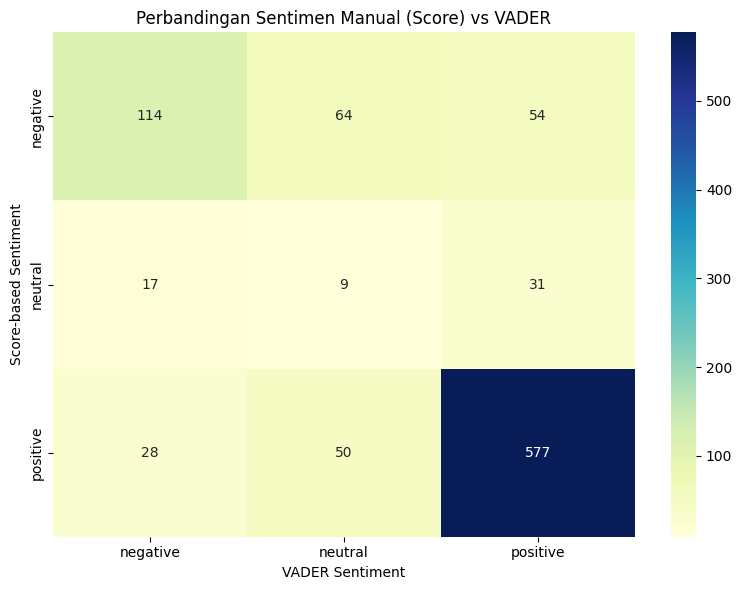

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [39]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 944
✅ Jumlah yang cocok    : 700
📊 Akurasi Kesesuaian   : 74.15%


### 6️⃣ **Topic Modelling**

In [40]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [41]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[would, give, star, old, son, want, bad, compa...",would give star old son want bad company make ...
1,"[bad, programming]",bad programming
2,"[star, war, droids, find, use, support, would,...",star war droids find use support would delete ...
3,"[really, want, use, say, connected, control, a...",really want use say connected control anything...
4,"[could, disappoint, support, buy, star, war, g...",could disappoint support buy star war garbage ...


In [42]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [43]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [44]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, really good, good robot, robot, good fun, program, really, ever, well, everything

🧠 Topik 2:
awesome, think, awesome easy, easy, pretty, like, learning, ok, age, learn

🧠 Topik 3:
great, robot, code, great love, like, kid, work, use, really, work great

🧠 Topik 4:
love, amazing, robot, love love, love robot, great love, much, love much, amazing love, use

🧠 Topik 5:
fun, cool, really, really fun, code, learn, lot, lot fun, amazing, use


In [45]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Kesan Positif terhadap Robot Sphero",
    1: "Topik 2 - Pembelajaran Coding yang Mudah & Menyenangkan",
    2: "Topik 3 - Pengalaman Positif Anak dalam Belajar dengan Robot",
    3: "Topik 4 - Kecintaan Tinggi terhadap Sphero",
    4: "Topik 5 - Belajar Koding yang Seru dan Interaktif"
}

def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik 1 - Kesan Positif terhadap Robot Sphero
🔑 Kata Kunci: good, really good, good robot, robot, good fun, program, really, ever, well, everything

🧠 Topik 2 - Pembelajaran Coding yang Mudah & Menyenangkan
🔑 Kata Kunci: awesome, think, awesome easy, easy, pretty, like, learning, ok, age, learn

🧠 Topik 3 - Pengalaman Positif Anak dalam Belajar dengan Robot
🔑 Kata Kunci: great, robot, code, great love, like, kid, work, use, really, work great

🧠 Topik 4 - Kecintaan Tinggi terhadap Sphero
🔑 Kata Kunci: love, amazing, robot, love love, love robot, great love, much, love much, amazing love, use

🧠 Topik 5 - Belajar Koding yang Seru dan Interaktif
🔑 Kata Kunci: fun, cool, really, really fun, code, learn, lot, lot fun, amazing, use


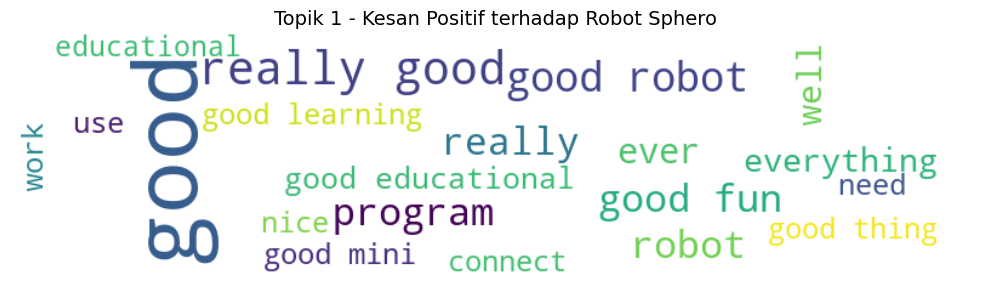

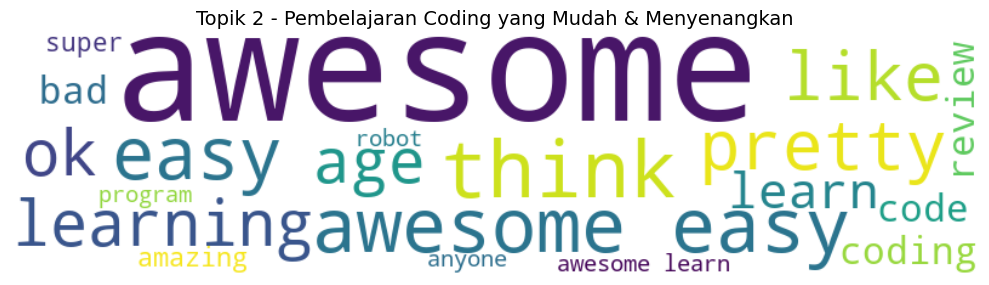

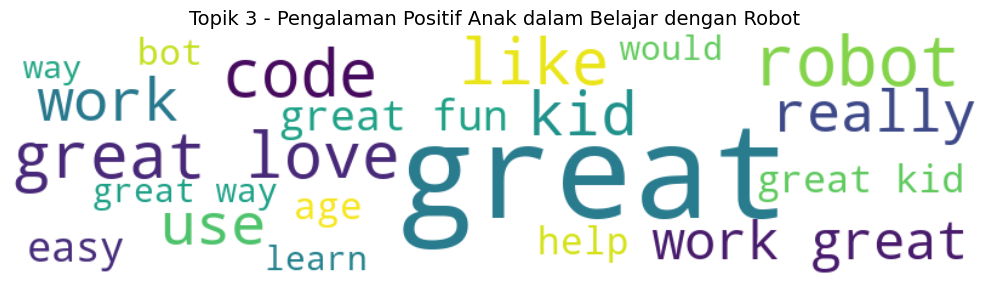

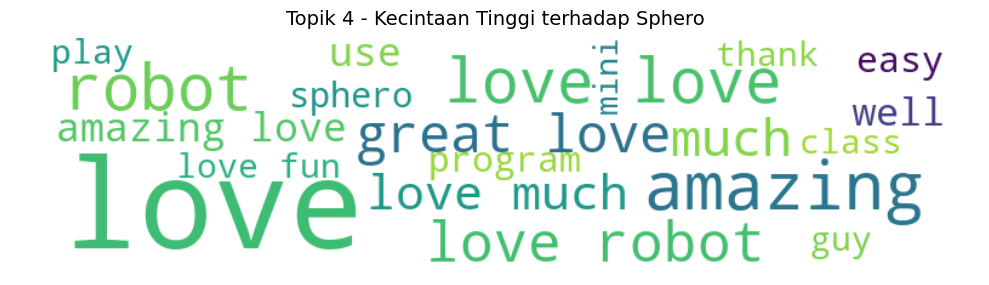

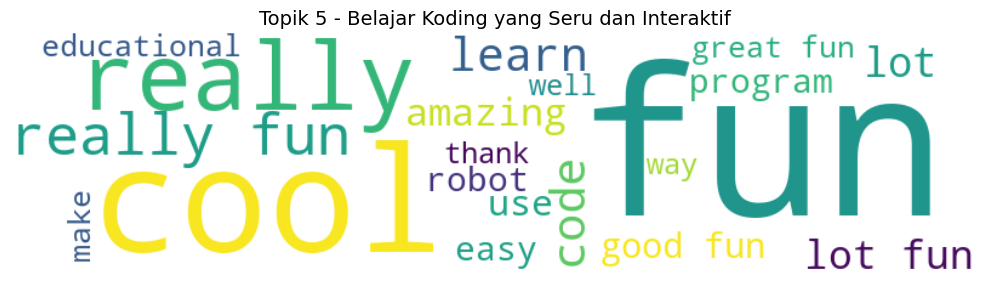

In [46]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [47]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

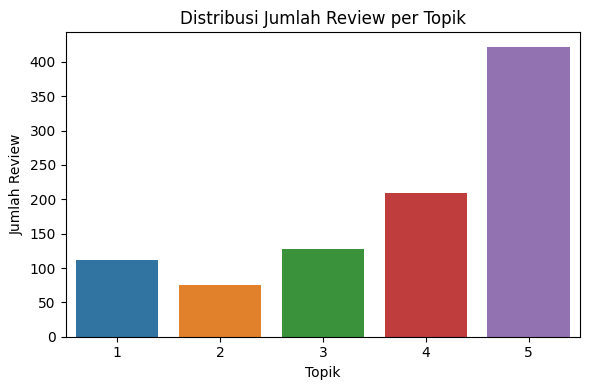

In [48]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [49]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[would, give, star, old, son, want, bad, compa...",would give star old son want bad company make ...,4,5,Topik 5 - Belajar Koding yang Seru dan Interaktif
1,"[bad, programming]",bad programming,1,2,Topik 2 - Pembelajaran Coding yang Mudah & Men...
2,"[star, war, droids, find, use, support, would,...",star war droids find use support would delete ...,4,5,Topik 5 - Belajar Koding yang Seru dan Interaktif
3,"[really, want, use, say, connected, control, a...",really want use say connected control anything...,4,5,Topik 5 - Belajar Koding yang Seru dan Interaktif
4,"[could, disappoint, support, buy, star, war, g...",could disappoint support buy star war garbage ...,4,5,Topik 5 - Belajar Koding yang Seru dan Interaktif


### 7️⃣ **Clustering**

In [50]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [51]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[would, give, star, old, son, want, bad, compa...",would give star old son want bad company make ...
1,"[bad, programming]",bad programming
2,"[star, war, droids, find, use, support, would,...",star war droids find use support would delete ...
3,"[really, want, use, say, connected, control, a...",really want use say connected control anything...
4,"[could, disappoint, support, buy, star, war, g...",could disappoint support buy star war garbage ...


In [52]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [53]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [54]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   fun, cool, connect, use, code, amazing, really, robot, like, great

🔷 Cluster 1:
   love, great, robot, use, kid, like, easy, amazing, thing, class

🔷 Cluster 2:
   work, great, really, amazing, connect, good, fun, like, fine, try

🔷 Cluster 3:
   awesome, easy, learn, fun, think, new, thank, code, program, like

🔷 Cluster 4:
   good, robot, program, fun, really, thing, challenge, mini, learning, need


In [55]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Pengalaman Belajar yang Seru dan Mudah Digunakan",
    1: "Cluster 2 - Interaksi Anak-anak dengan Robot Sphero",
    2: "Cluster 3 - Dukungan Teknis & Fitur Robotik",
    3: "Cluster 4 - Kesan Visual & Tampilan Produk",
    4: "Cluster 5 - Tantangan dan Pembelajaran Menggunakan Robot"
}

def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Pengalaman Belajar yang Seru dan Mudah Digunakan:
   fun, cool, connect, use, code, amazing, really, robot, like, great

🔷 Cluster 2 - Interaksi Anak-anak dengan Robot Sphero:
   love, great, robot, use, kid, like, easy, amazing, thing, class

🔷 Cluster 3 - Dukungan Teknis & Fitur Robotik:
   work, great, really, amazing, connect, good, fun, like, fine, try

🔷 Cluster 4 - Kesan Visual & Tampilan Produk:
   awesome, easy, learn, fun, think, new, thank, code, program, like

🔷 Cluster 5 - Tantangan dan Pembelajaran Menggunakan Robot:
   good, robot, program, fun, really, thing, challenge, mini, learning, need


In [56]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

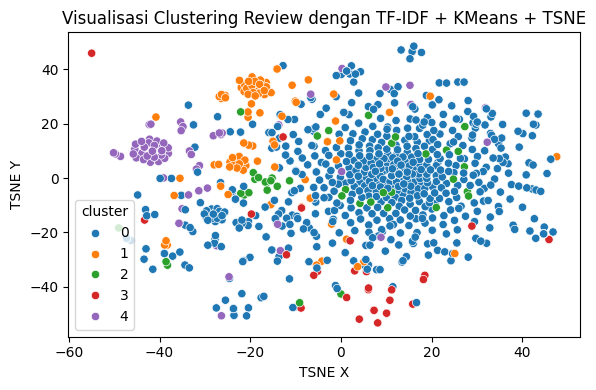

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [58]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[would, give, star, old, son, want, bad, compa...",would give star old son want bad company make ...,0,17.521027,-2.149858,Cluster 1 - Pengalaman Belajar yang Seru dan M...
1,"[bad, programming]",bad programming,0,42.995552,-22.149673,Cluster 1 - Pengalaman Belajar yang Seru dan M...
2,"[star, war, droids, find, use, support, would,...",star war droids find use support would delete ...,0,12.155693,12.126032,Cluster 1 - Pengalaman Belajar yang Seru dan M...
3,"[really, want, use, say, connected, control, a...",really want use say connected control anything...,0,8.158767,-1.508617,Cluster 1 - Pengalaman Belajar yang Seru dan M...
4,"[could, disappoint, support, buy, star, war, g...",could disappoint support buy star war garbage ...,0,14.660189,9.547475,Cluster 1 - Pengalaman Belajar yang Seru dan M...


### 8️⃣ **Penggabungan Data Hasil Review**

In [59]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [60]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,I would give this 0 stars if I could. I have t...,1,negative,negative,Topik 5 - Belajar Koding yang Seru dan Interaktif,Cluster 1 - Pengalaman Belajar yang Seru dan M...
1,has bad programming,1,negative,negative,Topik 2 - Pembelajaran Coding yang Mudah & Men...,Cluster 1 - Pengalaman Belajar yang Seru dan M...
2,"I have the star wars droids by sphero, and now...",1,negative,negative,Topik 5 - Belajar Koding yang Seru dan Interaktif,Cluster 1 - Pengalaman Belajar yang Seru dan M...
3,I really wanted to use my Bb-8 again and it sa...,1,negative,negative,Topik 5 - Belajar Koding yang Seru dan Interaktif,Cluster 1 - Pengalaman Belajar yang Seru dan M...
4,I could not be more disappointed and angry tha...,1,negative,negative,Topik 5 - Belajar Koding yang Seru dan Interaktif,Cluster 1 - Pengalaman Belajar yang Seru dan M...


In [61]:
output_path = "../data/review_final_sphero_edu.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_sphero_edu.xlsx
